In [35]:
import findspark
import os
findspark.init()

import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, to_date, hour, expr

In [36]:
spark = SparkSession.builder \
    .master("local[*]") \
    .appName('test') \
    .getOrCreate()

# Question 1:

## Install Spark and PySpark

- Install Spark
- Run PySpark
- Create a local spark session
- Execute spark.version.

**What's the output?**

In [37]:
print(spark.version)

3.3.2


# Question 2:
## FHV October 2019

Read the October 2019 FHV into a Spark Dataframe with a schema as we did in the lessons.

Repartition the Dataframe to 6 partitions and save it to parquet.

What is the average size of the Parquet (ending with .parquet extension) Files that were created (in MB)? Select the answer which most closely matches.

- 1MB
- 6MB
- 25MB
- 87MB

In [38]:
df = spark.read.csv('fhvhv\\fhv_tripdata_2019-10.csv.gz', header=True, inferSchema=True)
df.show(10)

+--------------------+-------------------+-------------------+------------+------------+-------+----------------------+
|dispatching_base_num|    pickup_datetime|   dropOff_datetime|PUlocationID|DOlocationID|SR_Flag|Affiliated_base_number|
+--------------------+-------------------+-------------------+------------+------------+-------+----------------------+
|              B00009|2019-10-01 00:23:00|2019-10-01 00:35:00|         264|         264|   null|                B00009|
|              B00013|2019-10-01 00:11:29|2019-10-01 00:13:22|         264|         264|   null|                B00013|
|              B00014|2019-10-01 00:11:43|2019-10-01 00:37:20|         264|         264|   null|                B00014|
|              B00014|2019-10-01 00:56:29|2019-10-01 00:57:47|         264|         264|   null|                B00014|
|              B00014|2019-10-01 00:23:09|2019-10-01 00:28:27|         264|         264|   null|                B00014|
|     B00021         |2019-10-01 00:00:4

In [39]:
repart_df = df.repartition(6)

In [40]:
repart_df.write.parquet('fhvhv/output/fhvhv_repart_6.parquet')

AnalysisException: path file:/c:/Users/USER/Code/data-engineering-zoomcamp/05-batch/code/fhvhv/output/fhvhv_repart_6.parquet already exists.

In [15]:
import os

In [32]:
# Directory path
path = 'fhvhv/output/fhvhv_repart_6.parquet'

# List all parquet files (ignoring hidden .crc files)
parquet_files = [f for f in os.listdir(path) if f.endswith('.parquet') and not f.startswith('.')]

# Check if files are being filtered correctly
print(parquet_files)

['part-00000-b7d65ad2-4e86-4bba-86af-af6962aa42ec-c000.snappy.parquet', 'part-00001-b7d65ad2-4e86-4bba-86af-af6962aa42ec-c000.snappy.parquet', 'part-00002-b7d65ad2-4e86-4bba-86af-af6962aa42ec-c000.snappy.parquet', 'part-00003-b7d65ad2-4e86-4bba-86af-af6962aa42ec-c000.snappy.parquet', 'part-00004-b7d65ad2-4e86-4bba-86af-af6962aa42ec-c000.snappy.parquet', 'part-00005-b7d65ad2-4e86-4bba-86af-af6962aa42ec-c000.snappy.parquet']


In [31]:
os.listdir('fhvhv/output/fhvhv_repart_6.parquet')

['.part-00000-b7d65ad2-4e86-4bba-86af-af6962aa42ec-c000.snappy.parquet.crc',
 '.part-00001-b7d65ad2-4e86-4bba-86af-af6962aa42ec-c000.snappy.parquet.crc',
 '.part-00002-b7d65ad2-4e86-4bba-86af-af6962aa42ec-c000.snappy.parquet.crc',
 '.part-00003-b7d65ad2-4e86-4bba-86af-af6962aa42ec-c000.snappy.parquet.crc',
 '.part-00004-b7d65ad2-4e86-4bba-86af-af6962aa42ec-c000.snappy.parquet.crc',
 '.part-00005-b7d65ad2-4e86-4bba-86af-af6962aa42ec-c000.snappy.parquet.crc',
 '._SUCCESS.crc',
 'part-00000-b7d65ad2-4e86-4bba-86af-af6962aa42ec-c000.snappy.parquet',
 'part-00001-b7d65ad2-4e86-4bba-86af-af6962aa42ec-c000.snappy.parquet',
 'part-00002-b7d65ad2-4e86-4bba-86af-af6962aa42ec-c000.snappy.parquet',
 'part-00003-b7d65ad2-4e86-4bba-86af-af6962aa42ec-c000.snappy.parquet',
 'part-00004-b7d65ad2-4e86-4bba-86af-af6962aa42ec-c000.snappy.parquet',
 'part-00005-b7d65ad2-4e86-4bba-86af-af6962aa42ec-c000.snappy.parquet',
 '_SUCCESS']

In [40]:
parquet_files = [file for file in os.listdir('fhvhv/output/fhvhv_repart_6.parquet') if file.endswith('.parquet') and not file.startswith('.')]
total_size = sum(os.path.getsize(os.path.join('fhvhv/output/fhvhv_repart_6.parquet',f)) for f in parquet_files)

In [41]:
parquet_files

['part-00000-b7d65ad2-4e86-4bba-86af-af6962aa42ec-c000.snappy.parquet',
 'part-00001-b7d65ad2-4e86-4bba-86af-af6962aa42ec-c000.snappy.parquet',
 'part-00002-b7d65ad2-4e86-4bba-86af-af6962aa42ec-c000.snappy.parquet',
 'part-00003-b7d65ad2-4e86-4bba-86af-af6962aa42ec-c000.snappy.parquet',
 'part-00004-b7d65ad2-4e86-4bba-86af-af6962aa42ec-c000.snappy.parquet',
 'part-00005-b7d65ad2-4e86-4bba-86af-af6962aa42ec-c000.snappy.parquet']

In [42]:
total_size_mb = total_size / (1024 * 1024)

In [43]:
average_size_mb = total_size_mb / len(parquet_files)
print(average_size_mb)

6.350232283274333


# Question 3:
## Count records

__How many taxi trips were there on the 15th of October?__

Consider only trips that started on the 15th of October.

- 108,164
- 12,856
- 452,470
- 62,610

In [24]:
pickup_date_df = df.withColumn("pickup_date",to_date(col('pickup_datetime'))).select('pickup_date')

In [28]:
pickup_date_df.filter(pickup_date_df.pickup_date == '2019-10-15').count()

62610

# Question 4:
## Longest trip for each day

__What is the length of the longest trip in the dataset in hours?__

- 631,152.50 Hours
- 243.44 Hours
- 7.68 Hours
- 3.32 Hours

In [41]:
df.createOrReplaceTempView('trip_data')

In [42]:
spark.sql("""
            select 
                pickup_datetime,
                dropoff_datetime,
                (unix_timestamp(dropoff_datetime) - unix_timestamp(pickup_datetime)) / 3600 as hours
            from
                trip_data
            order by hours desc
""").show()

+-------------------+-------------------+------------------+
|    pickup_datetime|   dropoff_datetime|             hours|
+-------------------+-------------------+------------------+
|2019-10-11 18:00:00|2091-10-11 18:30:00|          631152.5|
|2019-10-28 09:00:00|2091-10-28 09:30:00|          631152.5|
|2019-10-31 23:46:33|2029-11-01 00:13:00| 87672.44083333333|
|2019-10-01 21:43:42|2027-10-01 21:45:23| 70128.02805555555|
|2019-10-17 14:00:00|2020-10-18 00:00:00|            8794.0|
|2019-10-26 21:26:00|2020-10-26 21:36:00| 8784.166666666666|
|2019-10-30 12:30:04|2019-12-30 13:02:08|1464.5344444444445|
|2019-10-25 07:04:57|2019-12-08 07:54:33|1056.8266666666666|
|2019-10-25 07:04:57|2019-12-08 07:21:11|1056.2705555555556|
|2019-10-01 13:47:17|2019-11-03 15:20:28| 793.5530555555556|
|2019-10-01 07:21:12|2019-11-03 08:44:21| 793.3858333333334|
|2019-10-01 13:41:00|2019-11-03 14:58:51|          793.2975|
|2019-10-01 18:43:20|2019-11-03 19:43:13| 792.9980555555555|
|2019-10-01 18:43:46|201

# Question 5:
## User Interface

__Spark’s User Interface which shows the application's dashboard runs on which local port?__

- 80
- 443
- 4040
- 8080

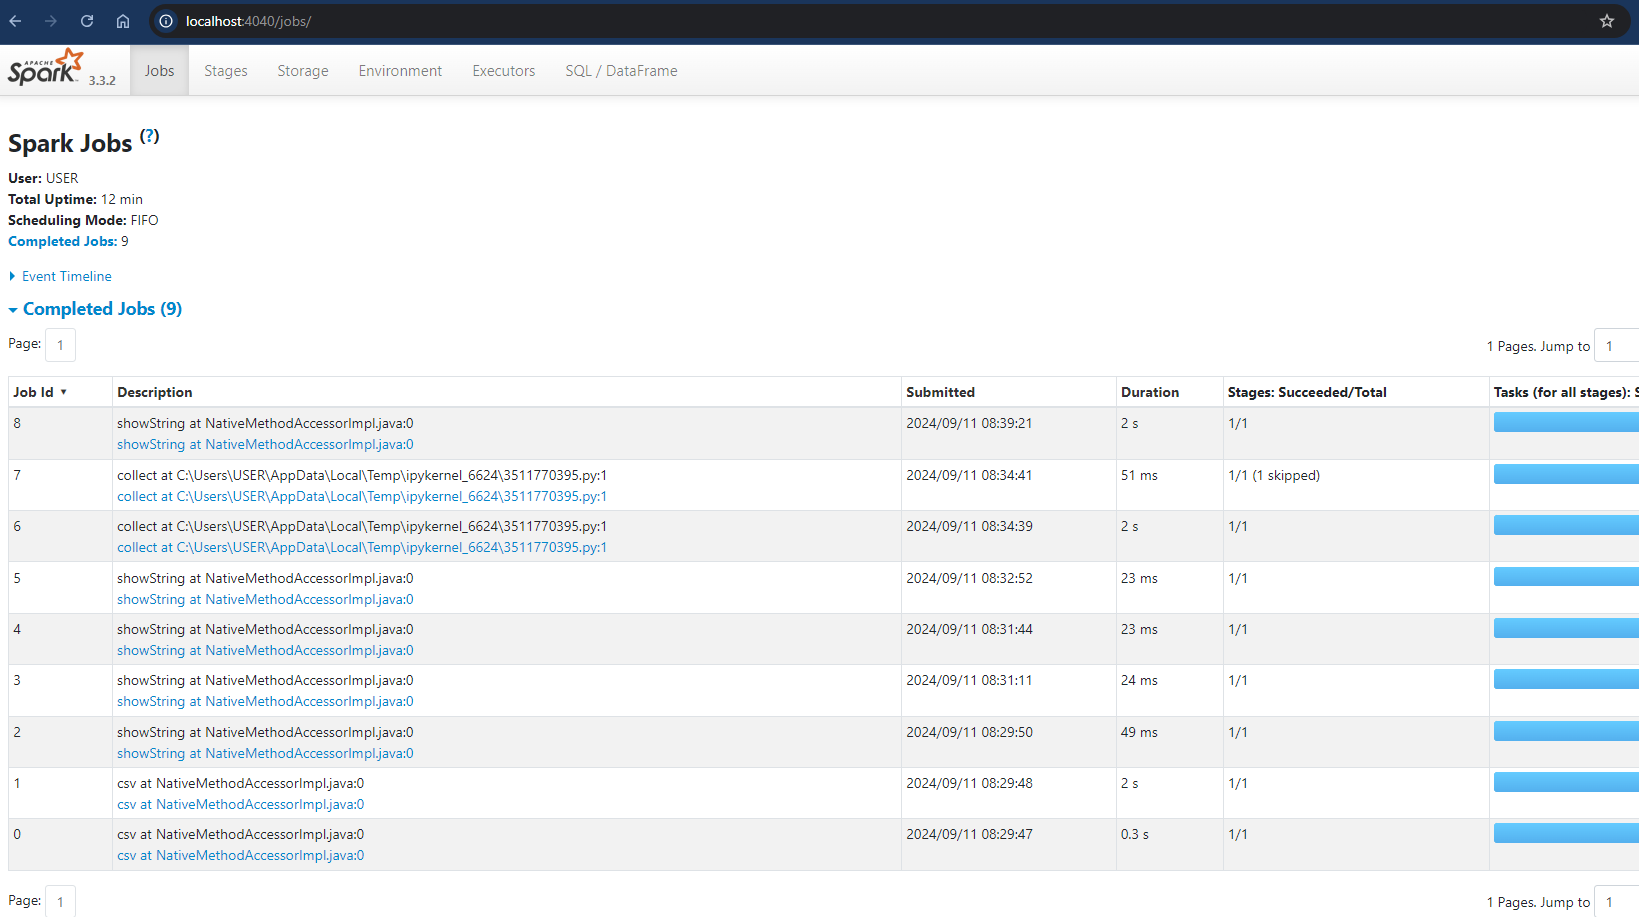

# Question 6:
## Least frequent pickup location zone

Load the zone lookup data into a temp view in Spark [Zone Data](!https://github.com/DataTalksClub/nyc-tlc-data/releases/download/misc/taxi_zone_lookup.csv)

Using the zone lookup data and the FHV October 2019 data, what is the name of the LEAST frequent pickup location Zone?

- 80
- 443
- 4040
- 8080

In [46]:
zone_df = spark.read.csv('data\\raw\\taxi_zone_lookup.csv', header=True, inferSchema=True)

In [47]:
zone_df.createOrReplaceTempView('zone')

In [51]:
spark.sql("""
          select * 
          from 
            zone
          limit 1
""").show()

+----------+-------+--------------+------------+
|LocationID|Borough|          Zone|service_zone|
+----------+-------+--------------+------------+
|         1|    EWR|Newark Airport|         EWR|
+----------+-------+--------------+------------+



In [43]:
df.show(1)

+--------------------+-------------------+-------------------+------------+------------+-------+----------------------+
|dispatching_base_num|    pickup_datetime|   dropOff_datetime|PUlocationID|DOlocationID|SR_Flag|Affiliated_base_number|
+--------------------+-------------------+-------------------+------------+------------+-------+----------------------+
|              B00009|2019-10-01 00:23:00|2019-10-01 00:35:00|         264|         264|   null|                B00009|
+--------------------+-------------------+-------------------+------------+------------+-------+----------------------+
only showing top 1 row



In [48]:
zone_df.show(1)

+----------+-------+--------------+------------+
|LocationID|Borough|          Zone|service_zone|
+----------+-------+--------------+------------+
|         1|    EWR|Newark Airport|         EWR|
+----------+-------+--------------+------------+
only showing top 1 row



In [53]:
spark.sql("""
          select 
            zone, 
            count(1) as trips_count
          from 
            trip_data
          left join 
            zone 
          on 
            zone.LocationID = trip_data.PUlocationID
          group by zone
          order by trips_count asc
""").show()

+--------------------+-----------+
|                zone|trips_count|
+--------------------+-----------+
|         Jamaica Bay|          1|
|Governor's Island...|          2|
| Green-Wood Cemetery|          5|
|       Broad Channel|          8|
|     Highbridge Park|         14|
|        Battery Park|         15|
|Saint Michaels Ce...|         23|
|Breezy Point/Fort...|         25|
|Marine Park/Floyd...|         26|
|        Astoria Park|         29|
|    Inwood Hill Park|         39|
|       Willets Point|         47|
|Forest Park/Highl...|         53|
|  Brooklyn Navy Yard|         57|
|        Crotona Park|         62|
|        Country Club|         77|
|     Freshkills Park|         89|
|       Prospect Park|         98|
|     Columbia Street|        105|
|  South Williamsburg|        110|
+--------------------+-----------+
only showing top 20 rows

